In [30]:
import pandas as pd
import numpy as np
import os

In [31]:
import seaborn as sns

In [32]:
df = pd.read_excel('Opportunities.xlsx')
df.head()

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 3,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV


In [33]:
column_lengths = len(df)
nan_percentages = (df.isna().sum() / column_lengths) * 100
columns_to_drop = nan_percentages[nan_percentages >= 80].index
df = df.drop(columns=columns_to_drop)

In [34]:
df["Probability"] = df["Probability"].apply(lambda x: 100 if x > 100 else x)

In [35]:
df=df.dropna(how='all')

In [36]:
df["Amount received"] = df["Amount received"].fillna(0)

In [37]:
df = df[df['Status'] != "Lost"]

In [38]:
df["Status"].unique()

array(['New', 'Won', 'Open'], dtype=object)

In [39]:
df["Stage"].unique()

array(['Won', 'Oral agreement', 'Initial Prospect', 'Advanced Prospect',
       'Dossier posed', 'Lost'], dtype=object)

In [40]:
df.columns

Index(['Opportunity ID', 'Business Account', 'Contact ID',
       'Estimated Close Date', 'Status', 'Stage', 'Probability',
       'Estimated amount', 'Amount received', 'Difference', 'Owner Name',
       'Class ID', 'Class', 'Programme financé', 'Agreement',
       'Type de financement', 'Zone SDLV', 'Created On', 'Last Modified Date',
       'Actual Close Date', 'Assignment Date', 'Branch ID'],
      dtype='object')

In [41]:
df.dtypes

Opportunity ID                   int64
Business Account                object
Contact ID                     float64
Estimated Close Date    datetime64[ns]
Status                          object
Stage                           object
Probability                      int64
Estimated amount               float64
Amount received                float64
Difference                     float64
Owner Name                     float64
Class ID                        object
Class                           object
Programme financé               object
Agreement                       object
Type de financement             object
Zone SDLV                       object
Created On              datetime64[ns]
Last Modified Date      datetime64[ns]
Actual Close Date       datetime64[ns]
Assignment Date         datetime64[ns]
Branch ID                       object
dtype: object

In [42]:
df.isna().sum()

Opportunity ID             0
Business Account           2
Contact ID              3125
Estimated Close Date       0
Status                     0
Stage                      0
Probability                0
Estimated amount           0
Amount received            0
Difference                 0
Owner Name               249
Class ID                   0
Class                      0
Programme financé       1976
Agreement               1944
Type de financement     3173
Zone SDLV               2856
Created On                 0
Last Modified Date         0
Actual Close Date       1607
Assignment Date          226
Branch ID                  0
dtype: int64

In [43]:
len(df["Programme financé"].unique())

28

In [44]:
# Drop one or more columns by name
columns_to_drop = ['Owner Name', 'Type de financement', 'Zone SDLV', "Branch ID"] 
df = df.drop(columns=columns_to_drop)

In [45]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,Class ID,Class,Programme financé,Agreement,Created On,Last Modified Date,Actual Close Date,Assignment Date
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,0.0,-9000.0,PPRIV EVNT,Private partnership - Event,NaN,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,0.0,-9000.0,PPRIV EVNT,Private partnership - Event,NaN,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,0.0,-140.0,PPRIV MEC,Private partnership - Patronage,Non fléché,False,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,0.0,-350.0,PPRIV MEC,Private partnership - Patronage,Non fléché,False,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,0.0,-120.0,PPRIV MEC,Private partnership - Patronage,Non fléché,False,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,0.0,-1059.0,PPRIV MEC,Private partnership - Patronage,Non fléché,True,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487
5982,4,C00024,NaN,2020-01-01,Won,Won,100,7500.0,7500.0,0.0,PPRIV MEC,Private partnership - Patronage,Job dans la Ville,True,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,0.0,-35000.0,PPRIV MEC,Private partnership - Patronage,Job dans la Ville,True,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,0.0,-20000.0,PPRIV MEC,Private partnership - Patronage,Séjours et Camps,False,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT


In [46]:
# Save the DataFrame to a CSV file
df.to_csv("opp.csv", index=False)  

In [47]:
# # Define the date range you want to keep (e.g., from '2023-10-21' to '2023-10-23')
# start_date = pd.to_datetime('2021-01-01')
# end_date = pd.to_datetime('2023-10-20')

# # Use conditional filtering to drop rows outside the date range
# df = df.loc[(df['Created On'] >= start_date) & (df['Created On'] <= end_date)]


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Basic dataset information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 0 to 5985
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Opportunity ID        5715 non-null   int64         
 1   Business Account      5713 non-null   object        
 2   Contact ID            2590 non-null   float64       
 3   Estimated Close Date  5715 non-null   datetime64[ns]
 4   Status                5715 non-null   object        
 5   Stage                 5715 non-null   object        
 6   Probability           5715 non-null   int64         
 7   Estimated amount      5715 non-null   float64       
 8   Amount received       5715 non-null   float64       
 9   Difference            5715 non-null   float64       
 10  Class ID              5715 non-null   object        
 11  Class                 5715 non-null   object        
 12  Programme financé     3739 non-null   object        
 13  Agre

In [50]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Opportunity ID    Contact ID  Probability  Estimated amount  \
count     5715.000000   2590.000000  5715.000000      5.715000e+03   
mean      3184.752056  40878.345946    91.328084      2.286824e+04   
std       1891.258097   3922.838377    20.731376      1.595953e+05   
min          1.000000  35255.000000     0.000000      0.000000e+00   
25%       1461.500000  36449.000000   100.000000      5.000000e+02   
50%       3202.000000  41004.000000   100.000000      4.000000e+03   
75%       4853.500000  44517.250000   100.000000      1.000000e+04   
max       6387.000000  47664.000000   100.000000      1.000000e+07   

       Amount received    Difference  
count     5.715000e+03  5.715000e+03  
mean      8.700956e+03 -1.416728e+04  
std       5.280334e+04  1.289648e+05  
min       0.000000e+00 -8.215573e+06  
25%       0.000000e+00 -5.000000e+03  
50%       0.000000e+00 -5.000000e+01  
75%       3.013200e+03  0.000000e+00  
max       1.784427e+06  1.000000e+05 

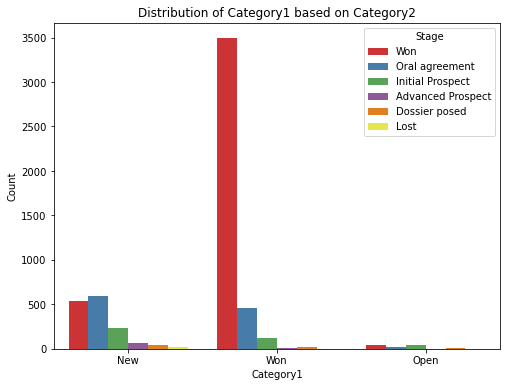

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', hue='Stage', palette='Set1')
plt.xlabel('Category1')
plt.ylabel('Count')
plt.title('Distribution of Category1 based on Category2')
plt.show()

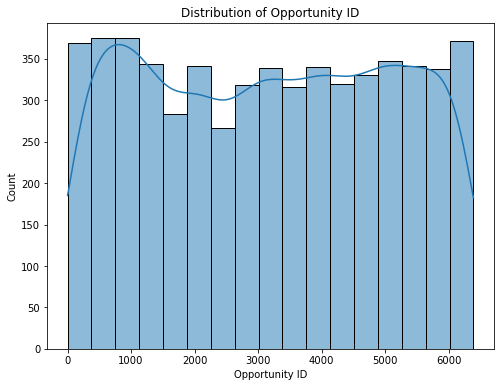

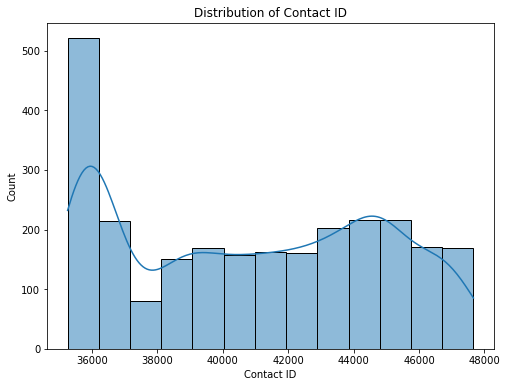

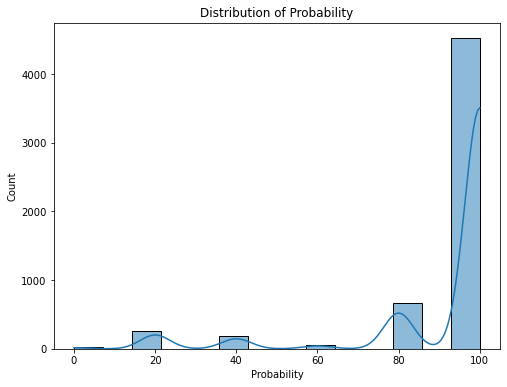

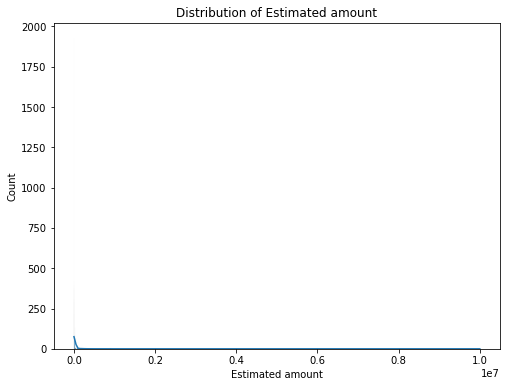

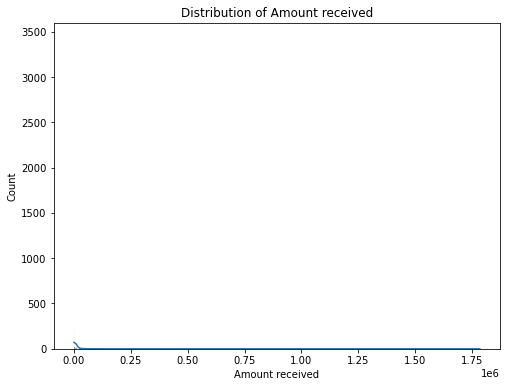

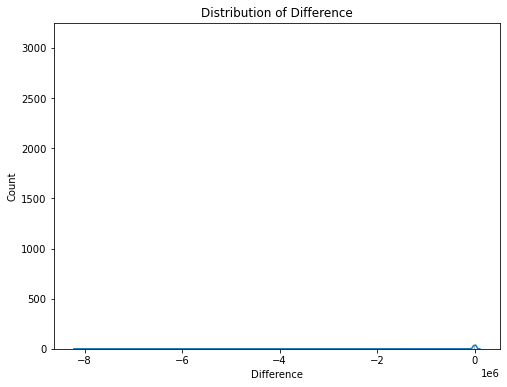

In [21]:
# Visualize the distribution of numerical columns
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


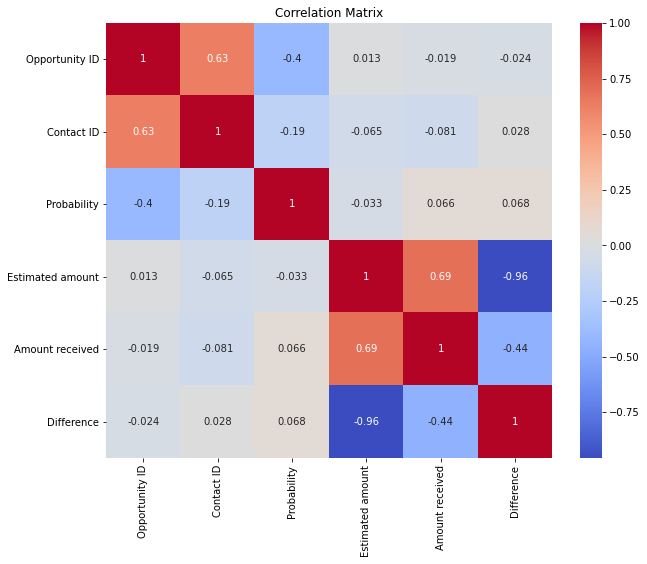

In [22]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

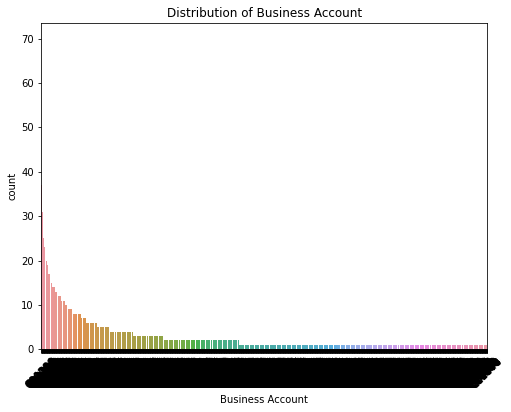

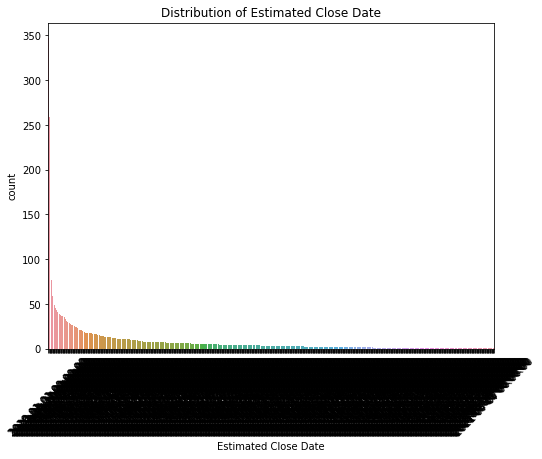

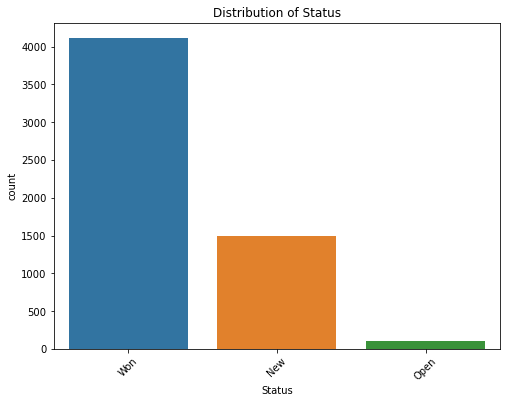

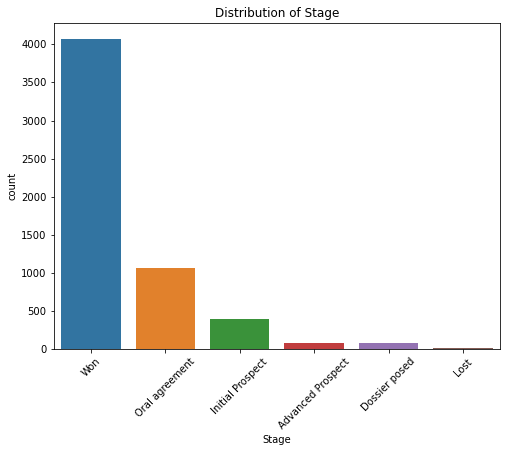

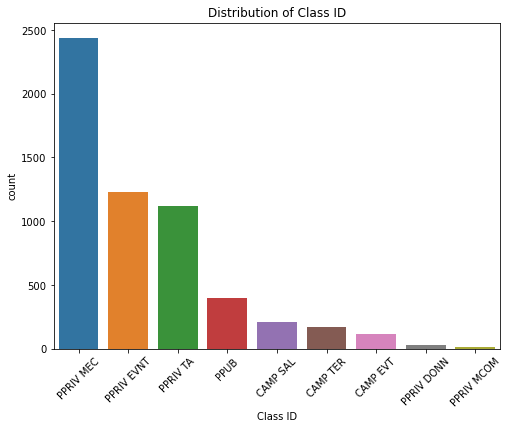

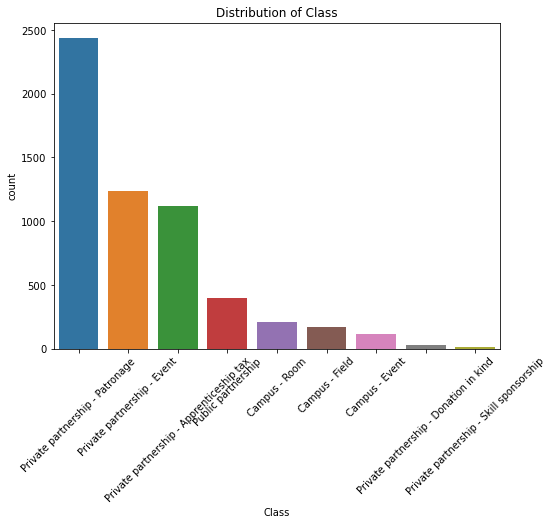

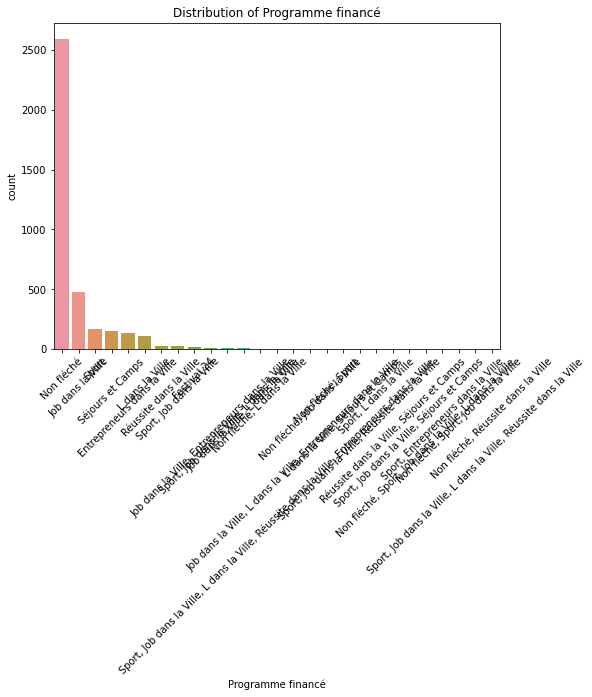

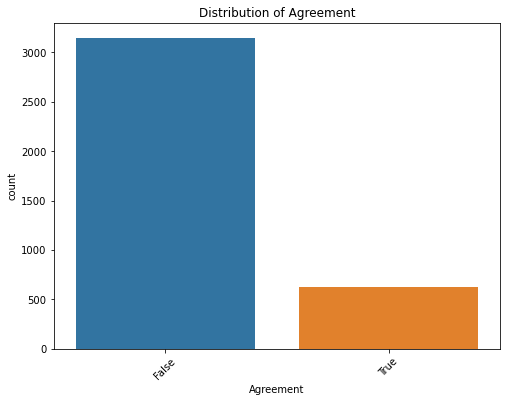

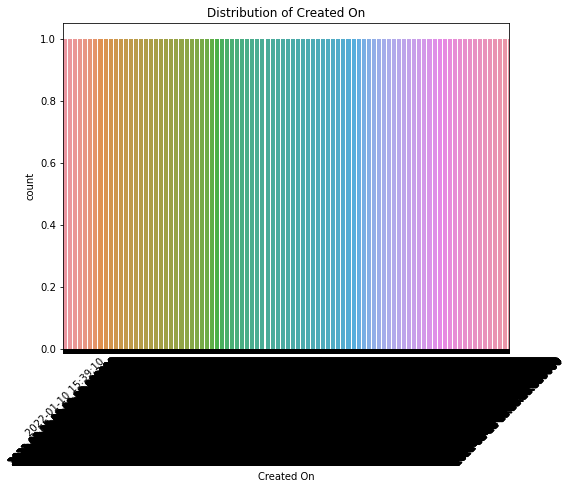

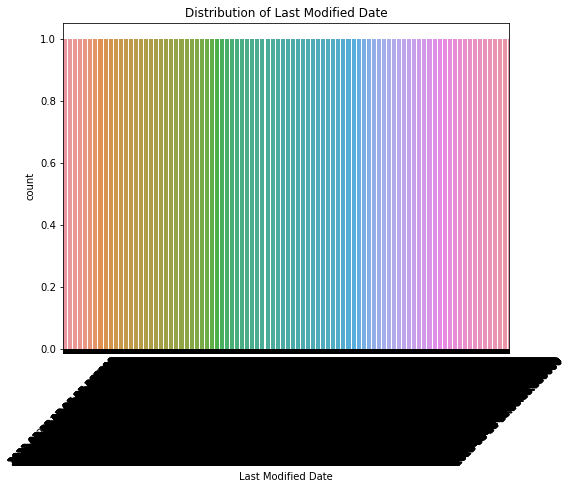

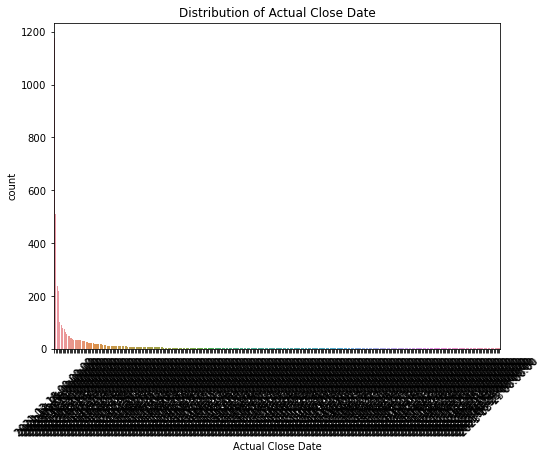

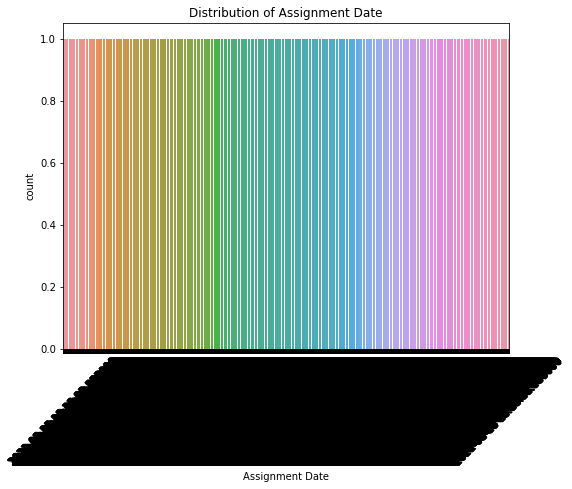

In [23]:
# Visualize the distribution of categorical columns
for column in df.select_dtypes(exclude=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()



In [25]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,Class ID,Class,Programme financé,Agreement,Created On,Last Modified Date,Actual Close Date,Assignment Date
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857
22,6365,C18115,46338.0,2023-10-25,Won,Won,100,150.00,0.0,-150.00,CAMP TER,Campus - Field,NaN,NaN,2023-10-10 14:43:49.470,2023-10-11 14:47:45.550,2023-10-11,2023-10-10 14:41:23.223
41,6346,C00510,36067.0,2023-11-10,New,Won,100,1047.81,0.0,-1047.81,PPRIV MEC,Private partnership - Patronage,Sport,False,2023-10-10 11:19:22.300,2023-10-10 11:19:22.300,NaT,2023-10-10 10:56:34.473
49,6338,C00366,37931.0,2023-11-15,Won,Won,100,756.00,0.0,-756.00,CAMP SAL,Campus - Room,NaN,NaN,2023-10-10 10:08:47.680,2023-10-10 11:18:18.663,2023-10-10,2023-10-10 10:07:16.487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.00,0.0,-1059.00,PPRIV MEC,Private partnership - Patronage,Non fléché,True,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487
5982,4,C00024,NaN,2020-01-01,Won,Won,100,7500.00,7500.0,0.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville,True,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.00,0.0,-35000.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville,True,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.00,0.0,-20000.00,PPRIV MEC,Private partnership - Patronage,Séjours et Camps,False,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT


In [26]:
# Drop one or more columns by name
columns_to_drop = ['Contact ID', 'Probability', 'Actual Close Date', "Last Modified Date", "Assignment Date", "Created On"] 
df = df.drop(columns=columns_to_drop)
df

,Opportunity ID,Business Account,Estimated Close Date,Status,Stage,Estimated amount,Amount received,Difference,Class ID,Class,Programme financé,Agreement
0,6387,C00037,2023-11-27,New,Won,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN,NaN
1,6386,C01254,2023-10-11,New,Won,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN,NaN
22,6365,C18115,2023-10-25,Won,Won,150.00,0.0,-150.00,CAMP TER,Campus - Field,NaN,NaN
41,6346,C00510,2023-11-10,New,Won,1047.81,0.0,-1047.81,PPRIV MEC,Private partnership - Patronage,Sport,False
49,6338,C00366,2023-11-15,Won,Won,756.00,0.0,-756.00,CAMP SAL,Campus - Room,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,2020-01-01,Won,Won,1059.00,0.0,-1059.00,PPRIV MEC,Private partnership - Patronage,Non fléché,True
5982,4,C00024,2020-01-01,Won,Won,7500.00,7500.0,0.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville,True
5983,3,C00011,2020-01-01,Won,Won,35000.00,0.0,-35000.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville,True
5984,2,C00331,2020-01-01,Won,Won,20000.00,0.0,-20000.00,PPRIV MEC,Private partnership - Patronage,Séjours et Camps,False


In [27]:
# Drop one or more columns by name
columns_to_drop = ['Agreement', 'Estimated Close Date'] 
df = df.drop(columns=columns_to_drop)
df

,Opportunity ID,Business Account,Status,Stage,Estimated amount,Amount received,Difference,Class ID,Class,Programme financé
0,6387,C00037,New,Won,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN
1,6386,C01254,New,Won,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN
22,6365,C18115,Won,Won,150.00,0.0,-150.00,CAMP TER,Campus - Field,NaN
41,6346,C00510,New,Won,1047.81,0.0,-1047.81,PPRIV MEC,Private partnership - Patronage,Sport
49,6338,C00366,Won,Won,756.00,0.0,-756.00,CAMP SAL,Campus - Room,NaN
...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,Won,Won,1059.00,0.0,-1059.00,PPRIV MEC,Private partnership - Patronage,Non fléché
5982,4,C00024,Won,Won,7500.00,7500.0,0.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville
5983,3,C00011,Won,Won,35000.00,0.0,-35000.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville
5984,2,C00331,Won,Won,20000.00,0.0,-20000.00,PPRIV MEC,Private partnership - Patronage,Séjours et Camps


In [28]:
# Save the DataFrame to a CSV file
df.to_csv("opp_1.csv", index=False)  

In [67]:
# Define the values you want to keep
values_to_keep = ['Won', 'Oral Agreement']

# Use conditional filtering to keep rows with specified values in 'Column1'
df1 = df.loc[df['Stage'].isin(values_to_keep)]

In [57]:
df["Stage"].unique()

array(['Won', 'Oral agreement', 'Initial Prospect', 'Advanced Prospect',
       'Dossier posed', 'Lost'], dtype=object)

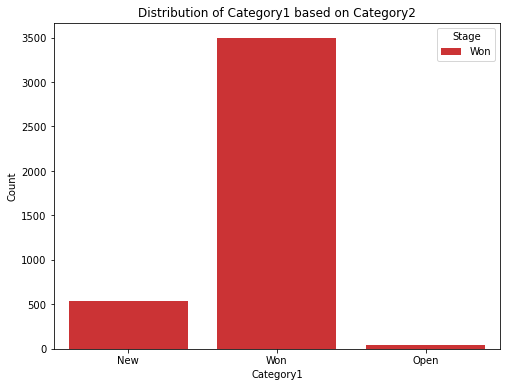

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Status', hue='Stage', palette='Set1')
plt.xlabel('Category1')
plt.ylabel('Count')
plt.title('Distribution of Category1 based on Category2')
plt.show()

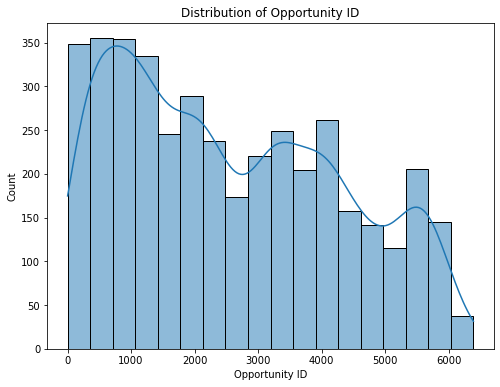

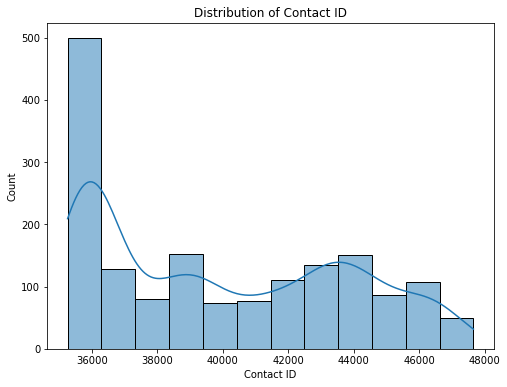

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


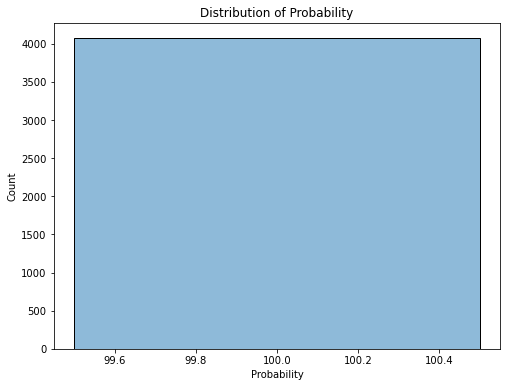

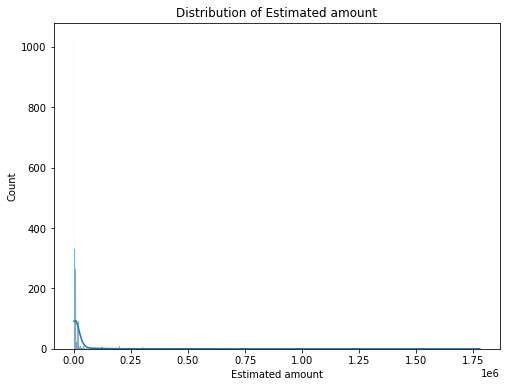

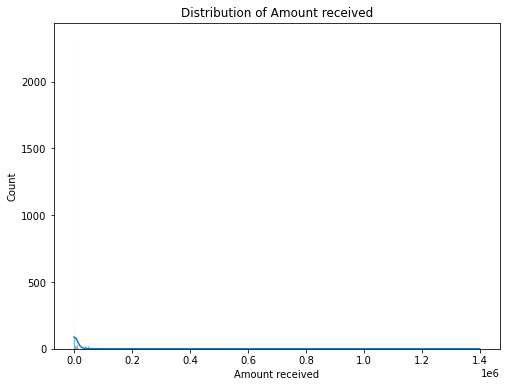

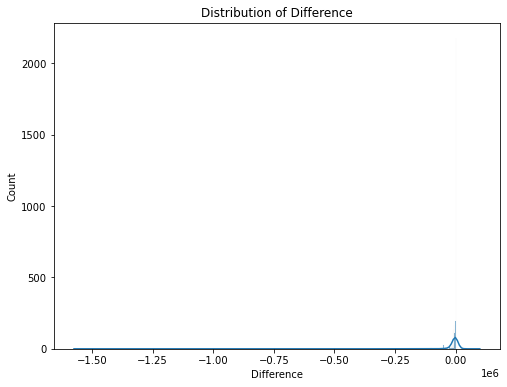

In [69]:
# Visualize the distribution of numerical columns
for column in df1.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


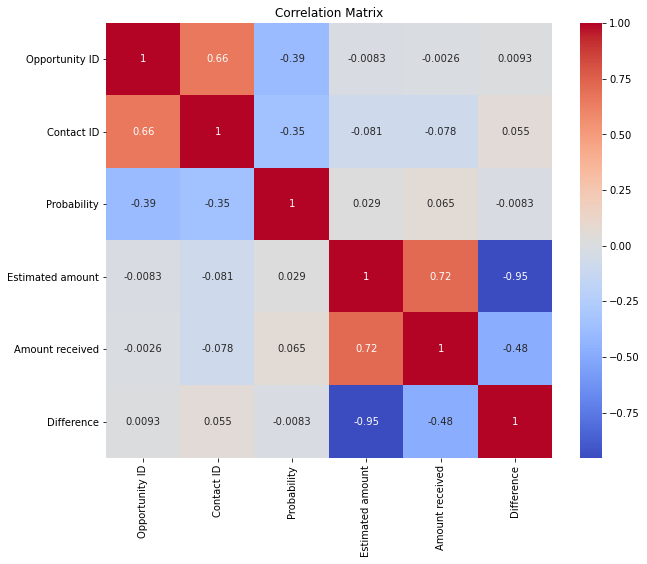

In [70]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

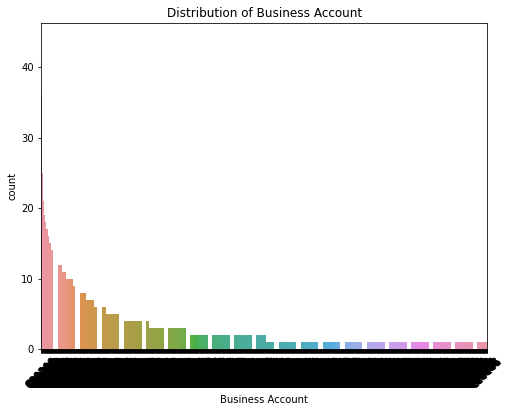

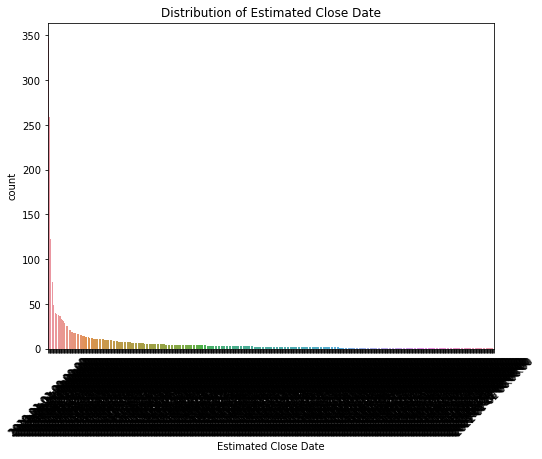

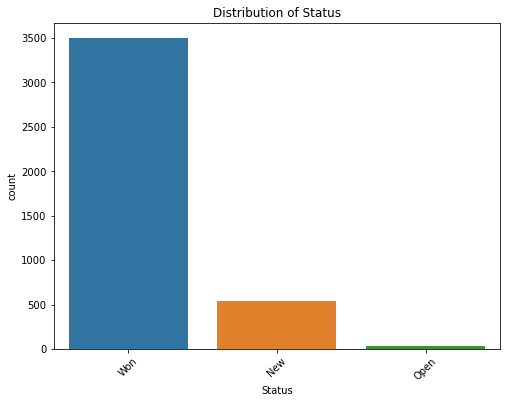

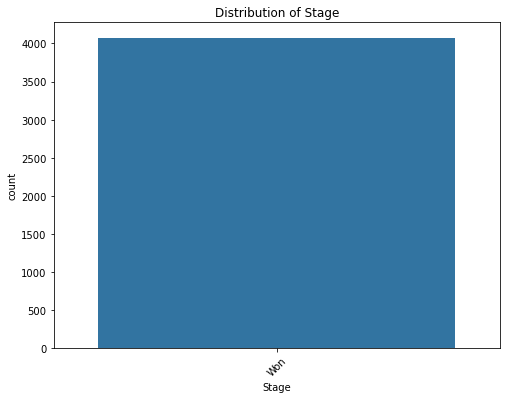

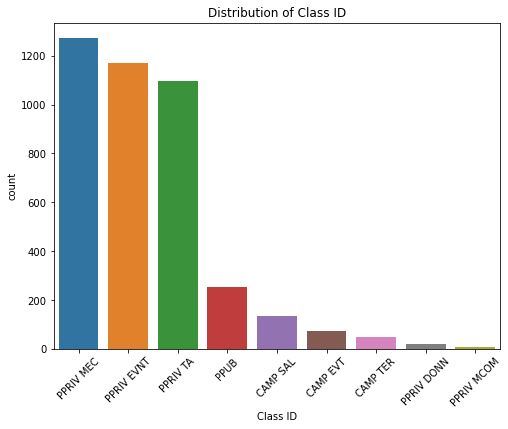

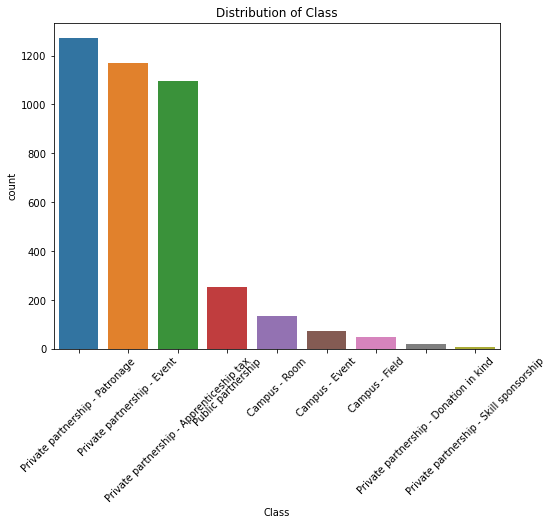

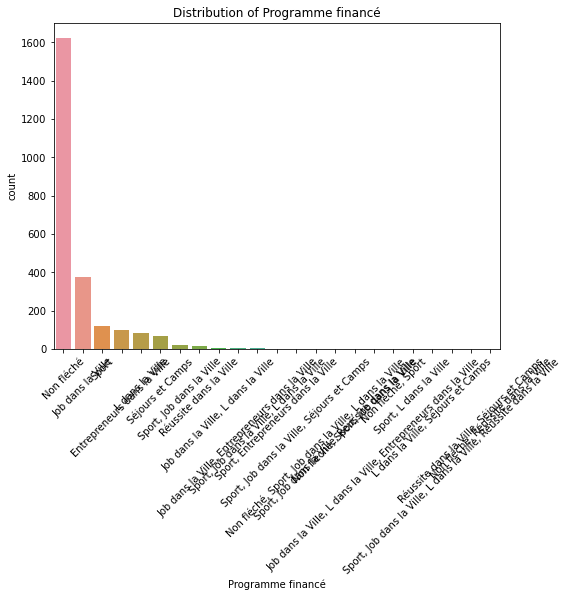

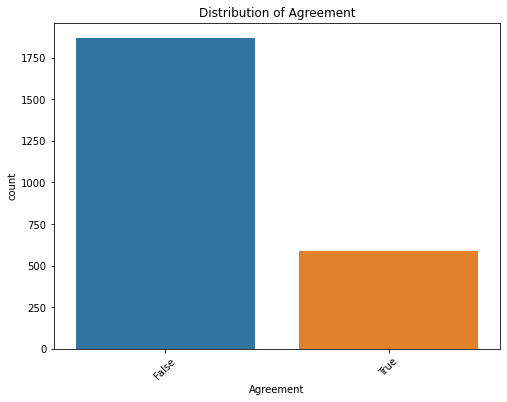

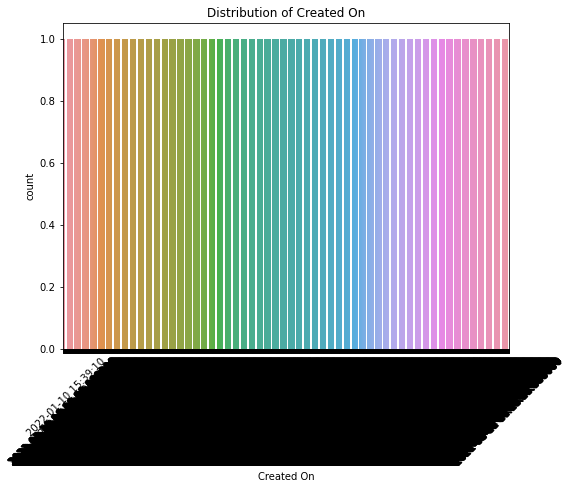

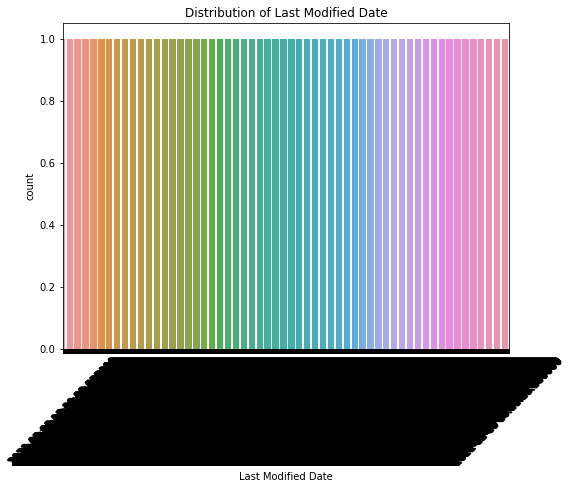

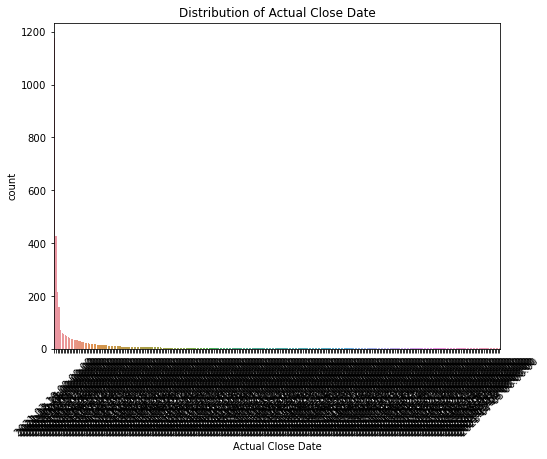

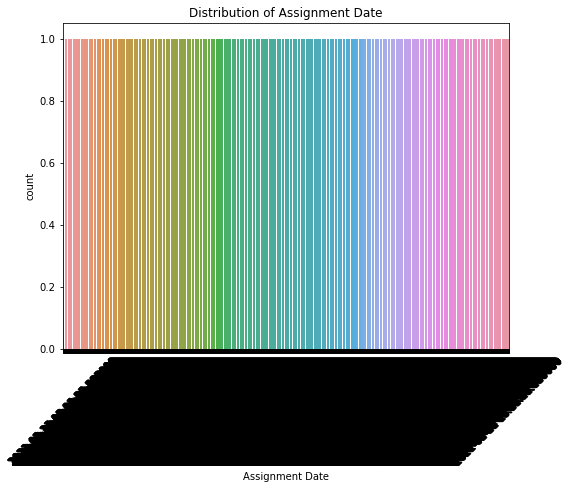

In [72]:
# Visualize the distribution of categorical columns
for column in df1.select_dtypes(exclude=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df1, order=df1[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()